# Baseball Case Study Project

# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 




# Importing required libraries

In [1]:
import pandas as pd
import numpy as np

#for plotting and EDA

import matplotlib.pyplot as plt
import seaborn as sns

#for model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

#for spliting dataset into train and test
from sklearn.model_selection import train_test_split

#for model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
bc=pd.read_csv(r"D:\DT EVAL Projects\baseball.csv")

In [3]:
bc.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#checking dimension of dataset
bc.shape

(30, 17)

There are 30 rows and 17 columns includinf target column

In [5]:
bc.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

#    Input features: 
    R-Runs, 
    AB-At Bats, 
    H-Hits, 
    D-Doubles, 
    T-Triples, 
    H- Homeruns,
    W-Walks, 
    SO-Strikeouts,
    SB- Stolen Bases, 
    RA-Runs Allowed,
    ER- Earned Runs,
    ERA- Earned Run Average (ERA),
    SHO- Shutouts,
    SV- Saves, 
    CG-Complete Games and 
    E- Errors

    Output: Number of predicted wins (W)

In [6]:
#checking Information

bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
#checking datatype

bc.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

    All columns are int64, except for ERA which is float.
    Hence there is no categorial features in dataset and all features are continous

# Checking and treating missing values

In [8]:
bc.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No missing values are present in the dataset.

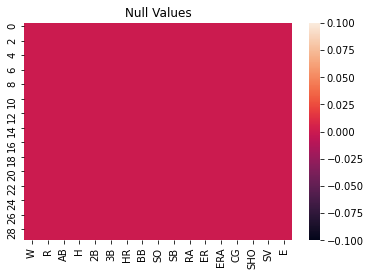

In [9]:
#heatmap for null vales

sns.heatmap(bc.isnull())
plt.title("Null Values")
plt.show()

Visual representation for the missing values in the given dataset. As we can see the heatmap is red which corresponds to value as 0, hence no null values are present in the dataset

In [10]:
#statstical summary
bc.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


    As we can observe that all columns have the count value of 30 which further verifies that there is no missing values in the dataset.

    The mean of wins is 81 which is almost mode of data. the Range of wins is 63-100 and IQR of data is 74-87.75.

    The mean of runs (R) is 688.23 which is around the mode of the data which is 689. The range of the data is 573 - 891 and IQR of data is 651.25 - 718.25.

    The mean of at bats (AB) is 5385 which is less than the mode of the data, 5510. The range of the data is 5385 - 5649 and IQR of data is 5464 - 5570.

    The mean of hits (H) is 1403.53 and the mode is 1382.50. The range of hits is 1324 - 1515 and IQR is 1363 - 1451.

    The mean of doubles (2B) is 274.73 which is around the mode of the data, 275.50. The range of the data is 236 - 308 and IQR is 262.25 - 288.75.

    The mean of triples (3B) is 31.30 which is over the mode of the data, 31.00. The range of triples is 13 - 49 and IQR of data is 23 - 39.

    The mean of home runs (HR) is 163.63 and the mode is 158.50. The range of home runs data is 100 - 232 and IQR is 140.25 - 177.

    The mean of walks (BB) is 469.10 and the mode is 473.00. The range of BB is 375.00 - 570.00 and IQR is 428.25 - 501.25.

    The mean of strike outs (SO) is 1248.20 and the mode is 1261.50. The range of SO is 973 - 1518 and IQR is 1157.50 - 1311.50.

    The mean of stolen bases (SB) is 83.50 which is also the mode. The range of SB is 44 - 134 and IQR is 69 - 96.50.

    The mean of runs allowed (RA) is 688.23 and the mode is 695.50. The range of RA is 525.00 - 844.00 and IQR is 636.25 - 732.50.

    The mean of earned runs (ER) is 635.83 and the mode is 644.50. The range of ER is 478.00 - 799.00 and IQR is 587.25 - 679.25.

    The mean of earned runs average (ERA) is 3.96 and the mode is 4.02. The range of ERA is 2.94 - 5.04 and IQR is 3.68 - 4.22.

    The mean of completed games (CG) is 3.47 and the mode is 3.00. The range of CG is 0 - 11 and IQR is 9 - 13.

    The mean of shut outs (SHO) is 11.30 and the mode is 12. The range of SHO is 4 - 21 and IQR is 9 - 13.

    The mean of Saves (SV) is 43.07 and the mode is 42. The range of SV is 28 - 62 and IQR is 37.25 - 46.75.

    The mean of Errors (E) is 94.33 and the mode is 91. The range of errors is 75 - 126 and IQR is 86 - 96.75.

    All the columns have very varied range and IQR hence we would require scaling prior to model building.

In [11]:
#check null values

for column in bc.columns:
    print(f"{column}: Number of unique values {bc[column].nunique()}")

W: Number of unique values 24
R: Number of unique values 28
AB: Number of unique values 29
H: Number of unique values 29
2B: Number of unique values 22
3B: Number of unique values 23
HR: Number of unique values 27
BB: Number of unique values 29
SO: Number of unique values 29
SB: Number of unique values 27
RA: Number of unique values 30
ER: Number of unique values 30
ERA: Number of unique values 30
CG: Number of unique values 9
SHO: Number of unique values 12
SV: Number of unique values 20
E: Number of unique values 21


Here all features are usefull , so we cant drop any columns.

# UniVariate Analysis

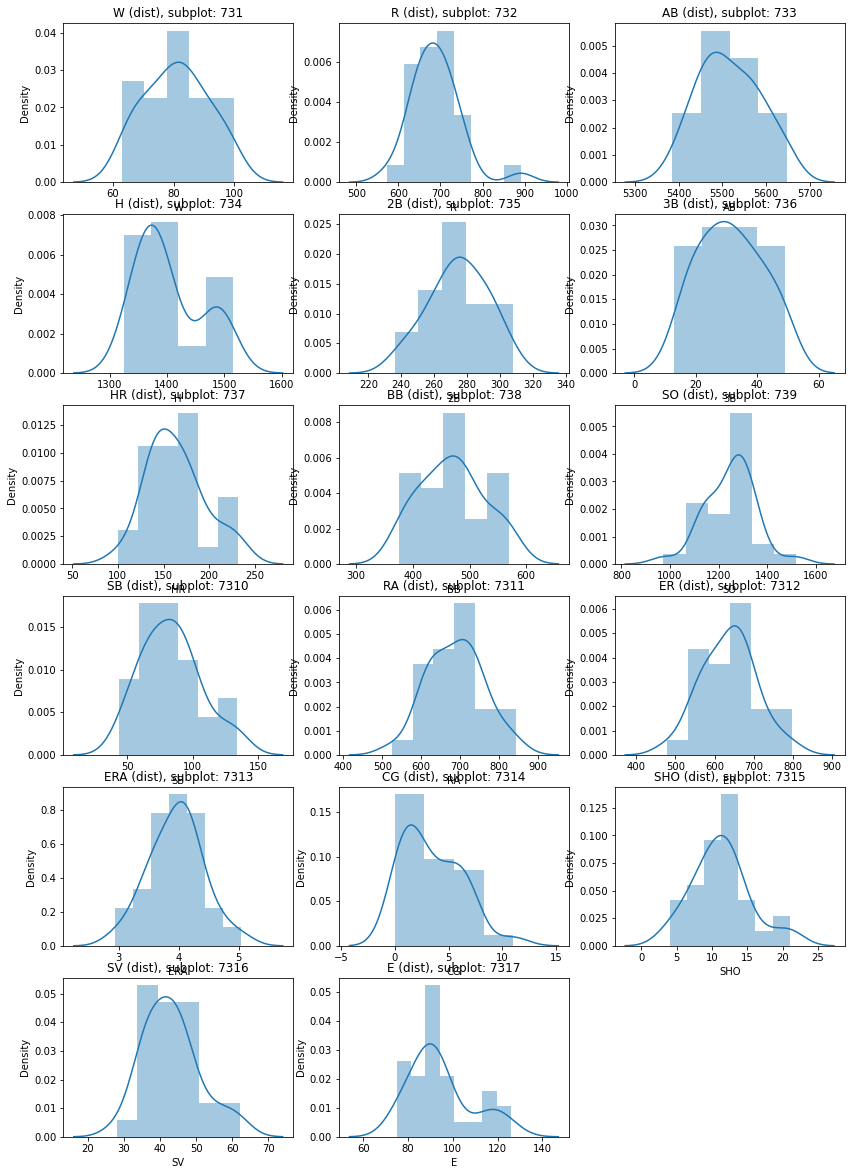

In [12]:
#Distplot for each column

Columns=bc.columns

#plot numerical data

a= 7 #no of rows
b= 3 # no of columns
c= 1 #initialize plot counter

fig=plt.figure(figsize=(14,24))

for i in Columns:
    plt.subplot(a,b,c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(bc[i])
    c= c+1
    
plt.show()

None of the graph are perfectly bell shaped , it seems there is skewness in them

# Bivariate Analysis

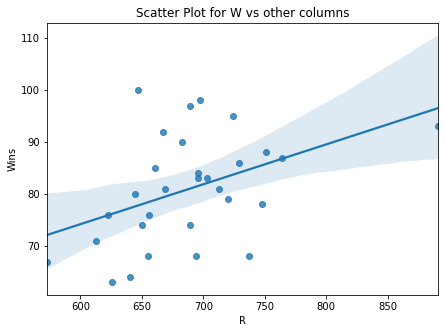

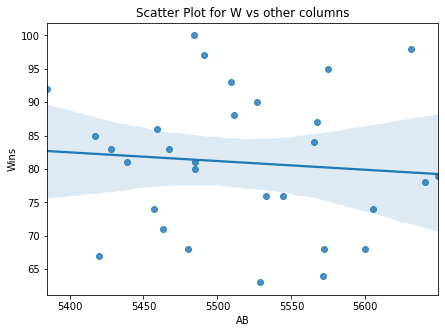

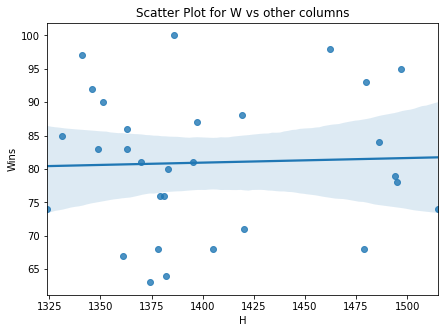

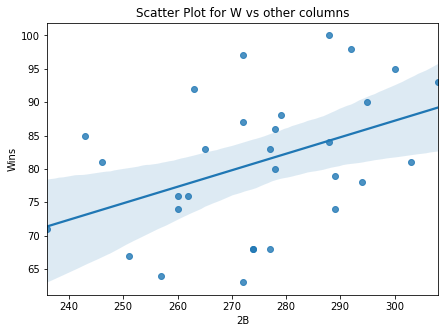

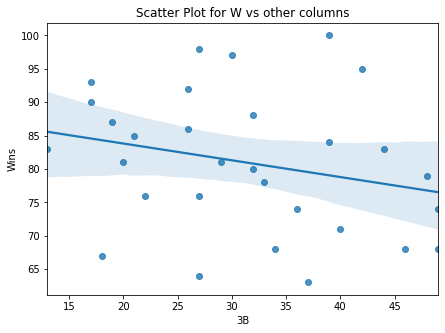

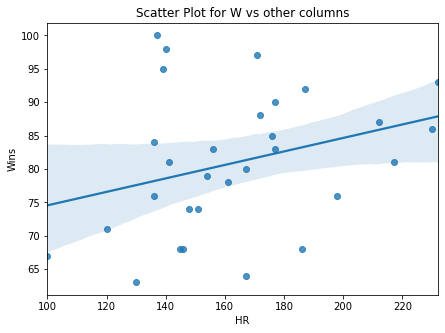

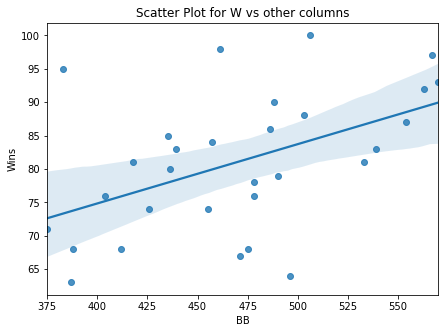

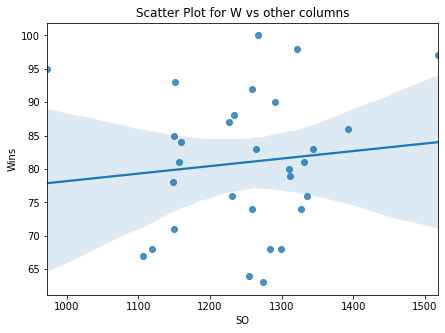

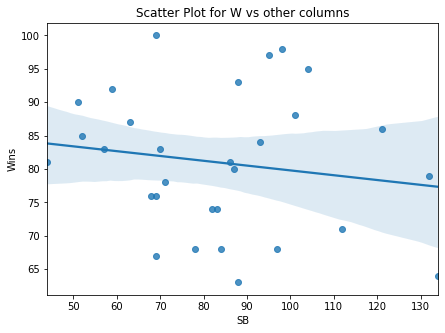

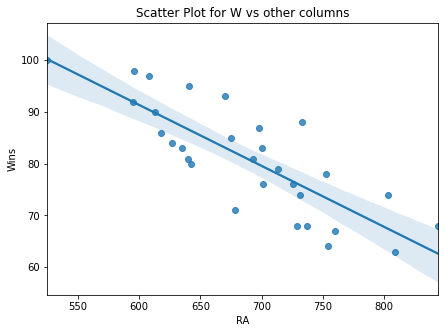

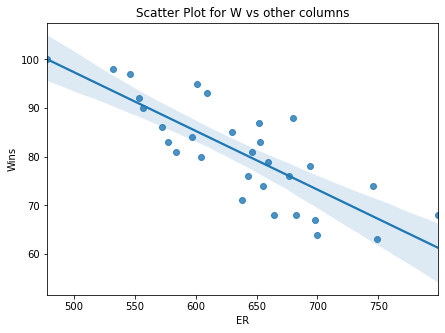

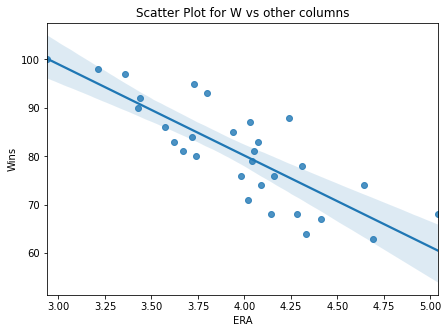

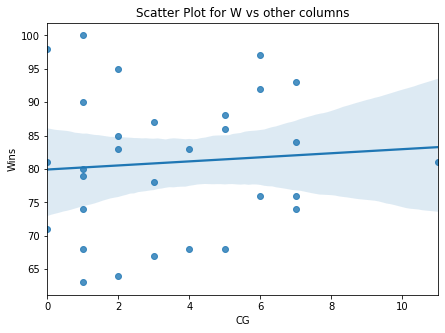

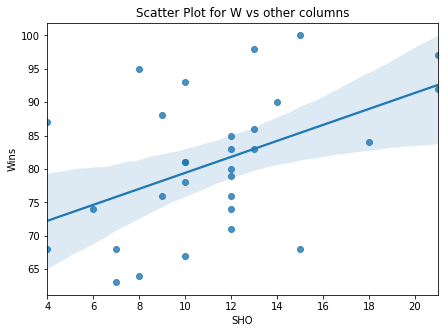

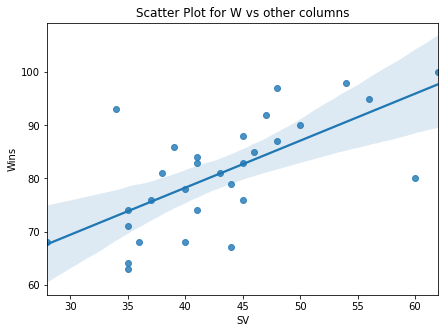

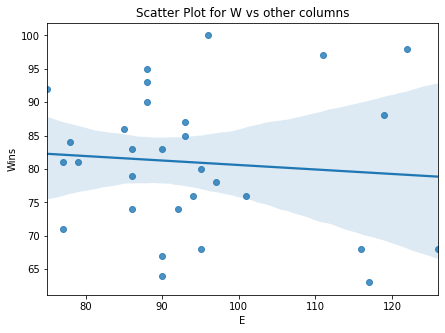

In [13]:
#checking W is variated with all columns seprately

for i in bc.columns[1:]:                                         #bivariate analysis
    plt.figure(figsize=(7,5))
    sns.regplot(bc[i],bc['W'])
    plt.title('Scatter Plot for W vs other columns')
    plt.xlabel(i)
    plt.ylabel('Wins')
    plt.show()
    


RA, ER, ERA showed strong negative relationship with W.

R, 2B, HR, BB, SHO, SV showed positive linear relation with W but with a small slope.

E, CG, AB, H, SO, 3B, SB showed less relationship with W.

# Multi Varaite Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

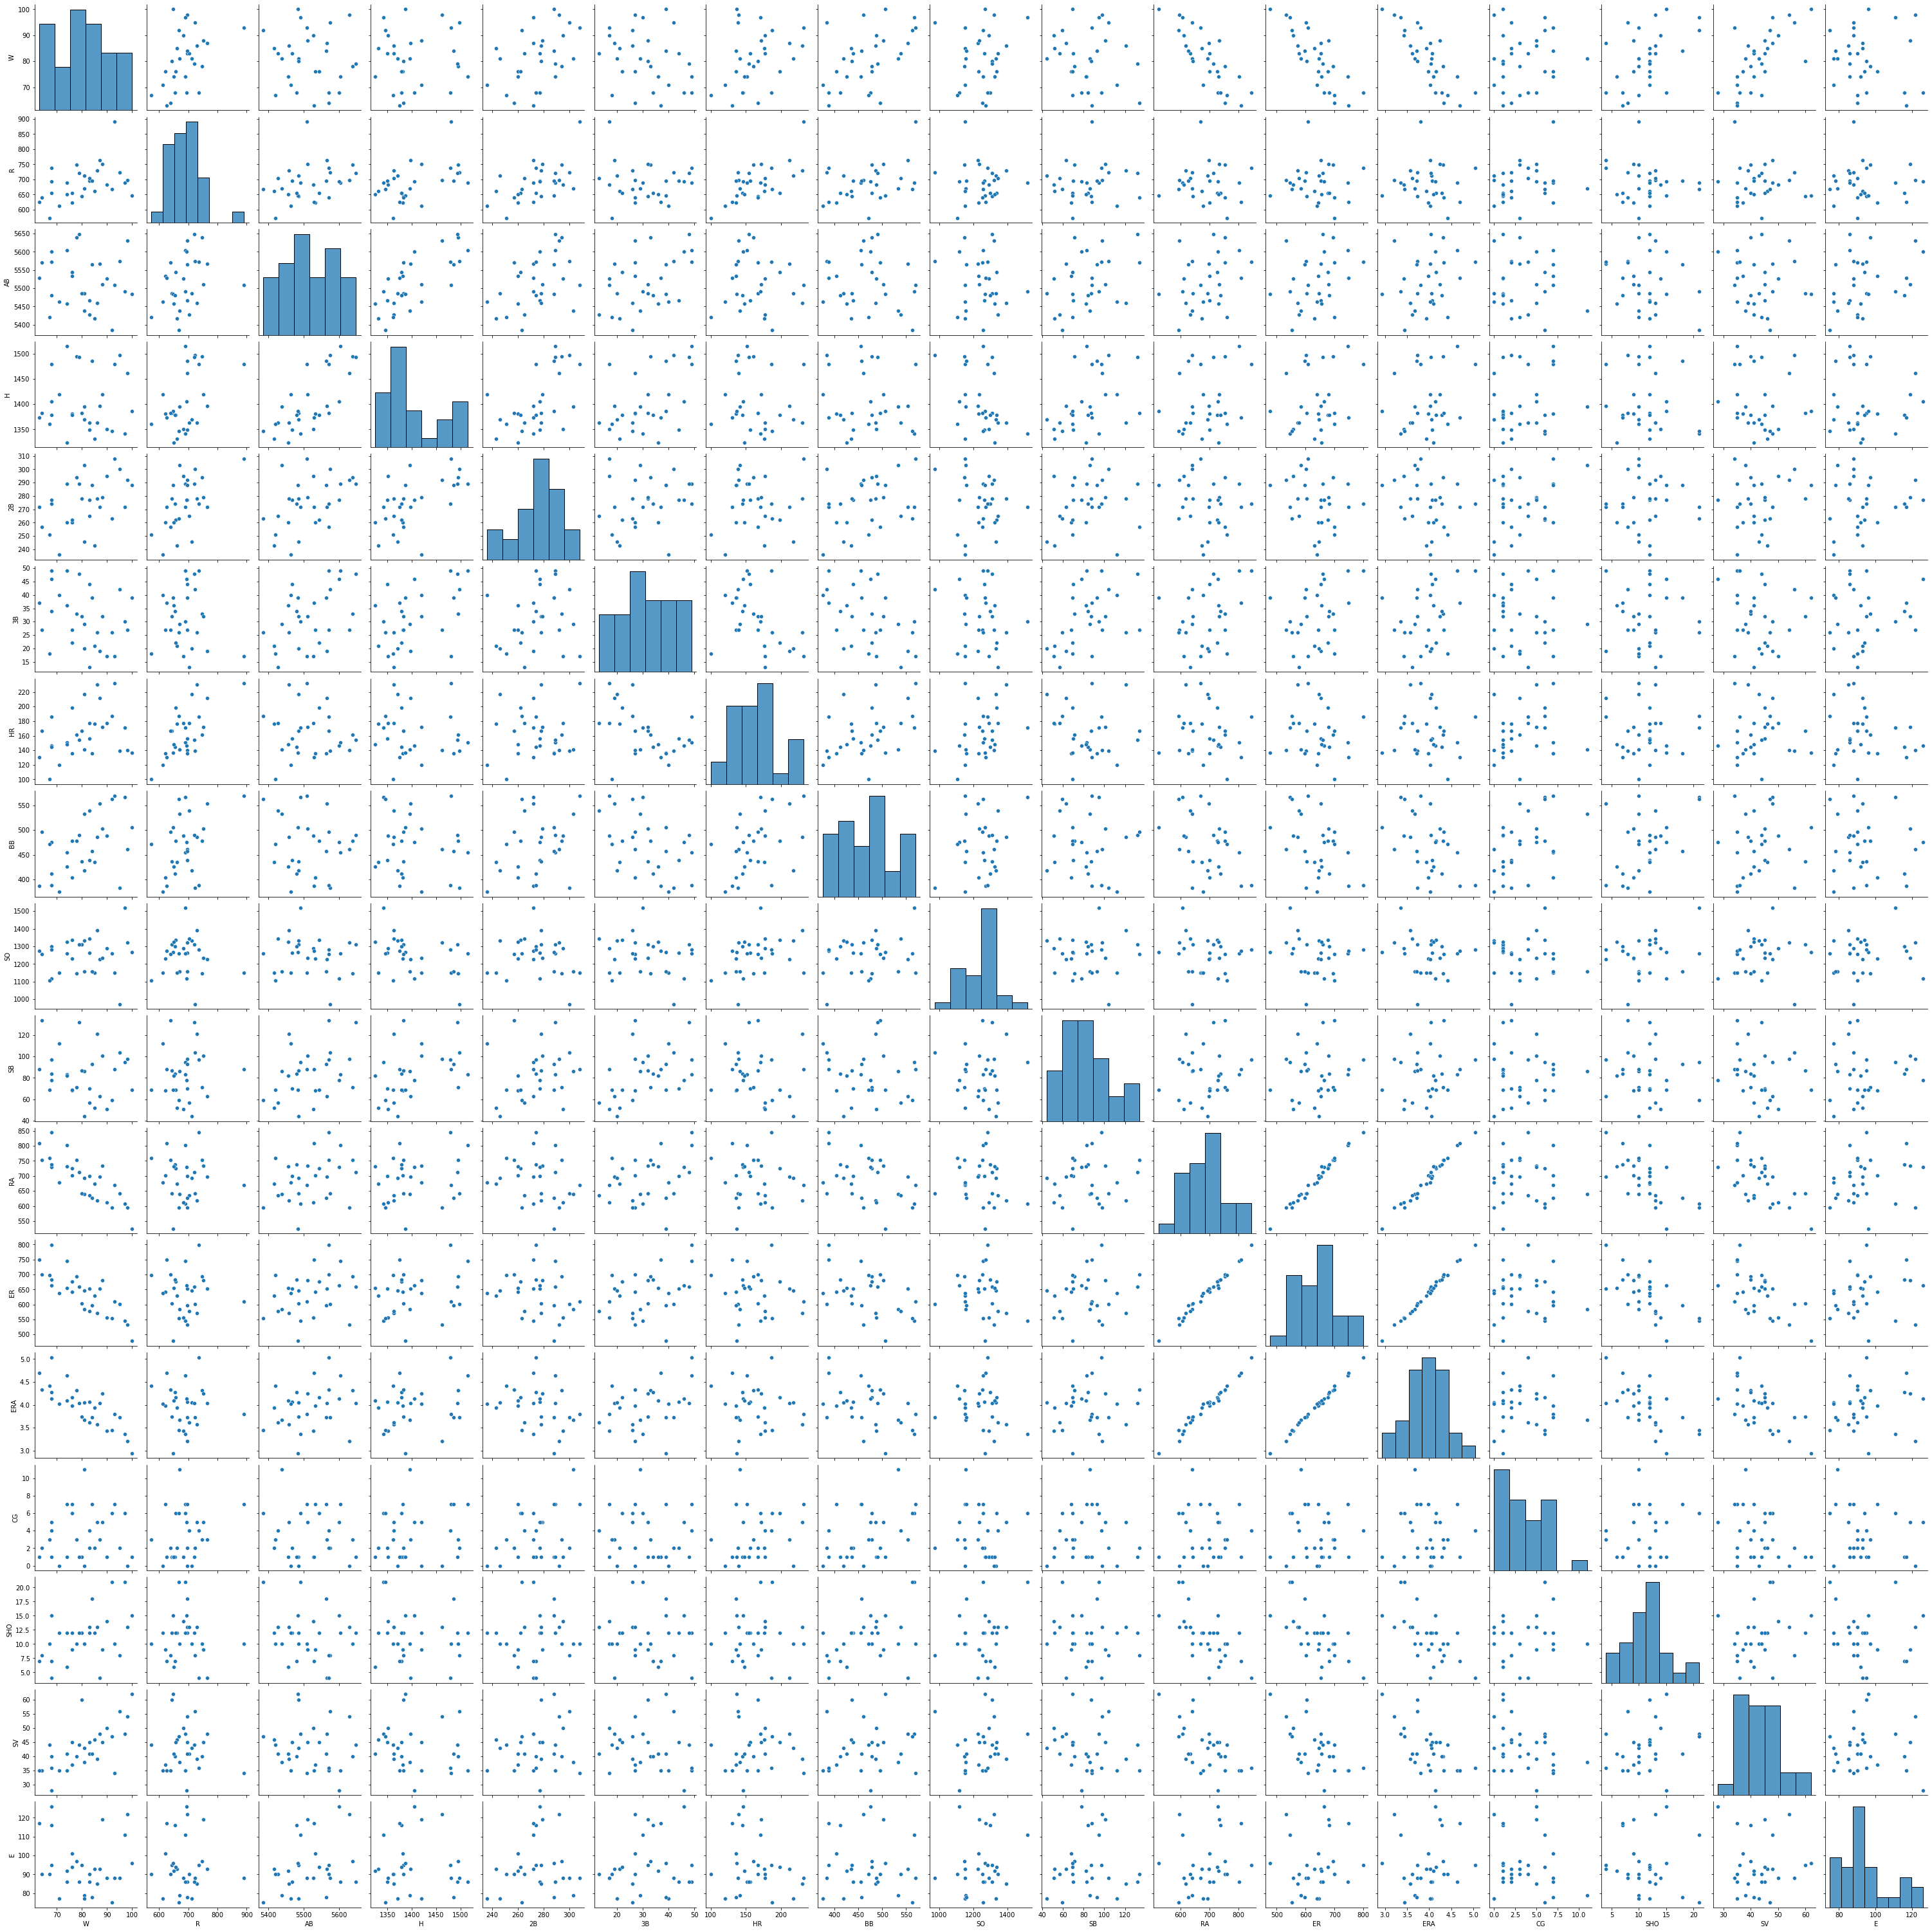

In [14]:
#checking normal distribution of each column

sns.pairplot(bc)
plt.show

# Checking correlation

In [15]:
#check corrltn
bc.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


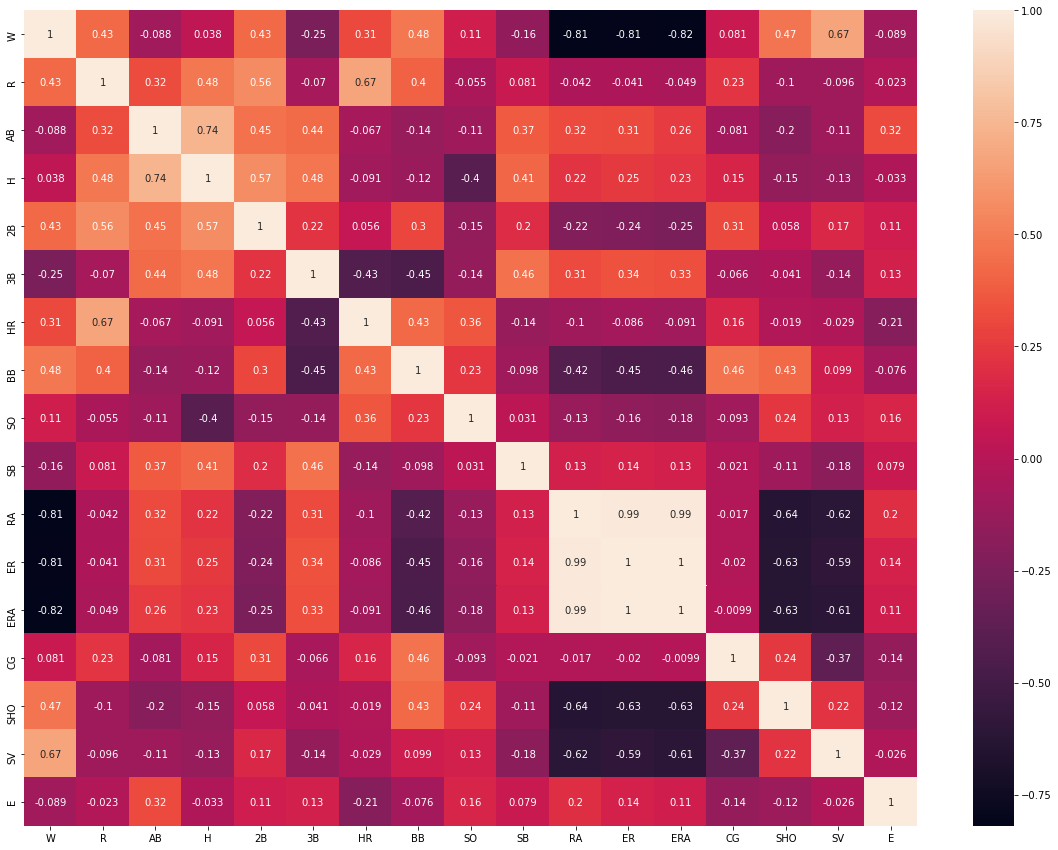

In [16]:
#Heatmap for correlation

plt.figure(figsize=[20,15])
sns.heatmap(bc.corr(),annot=True)
plt.show()

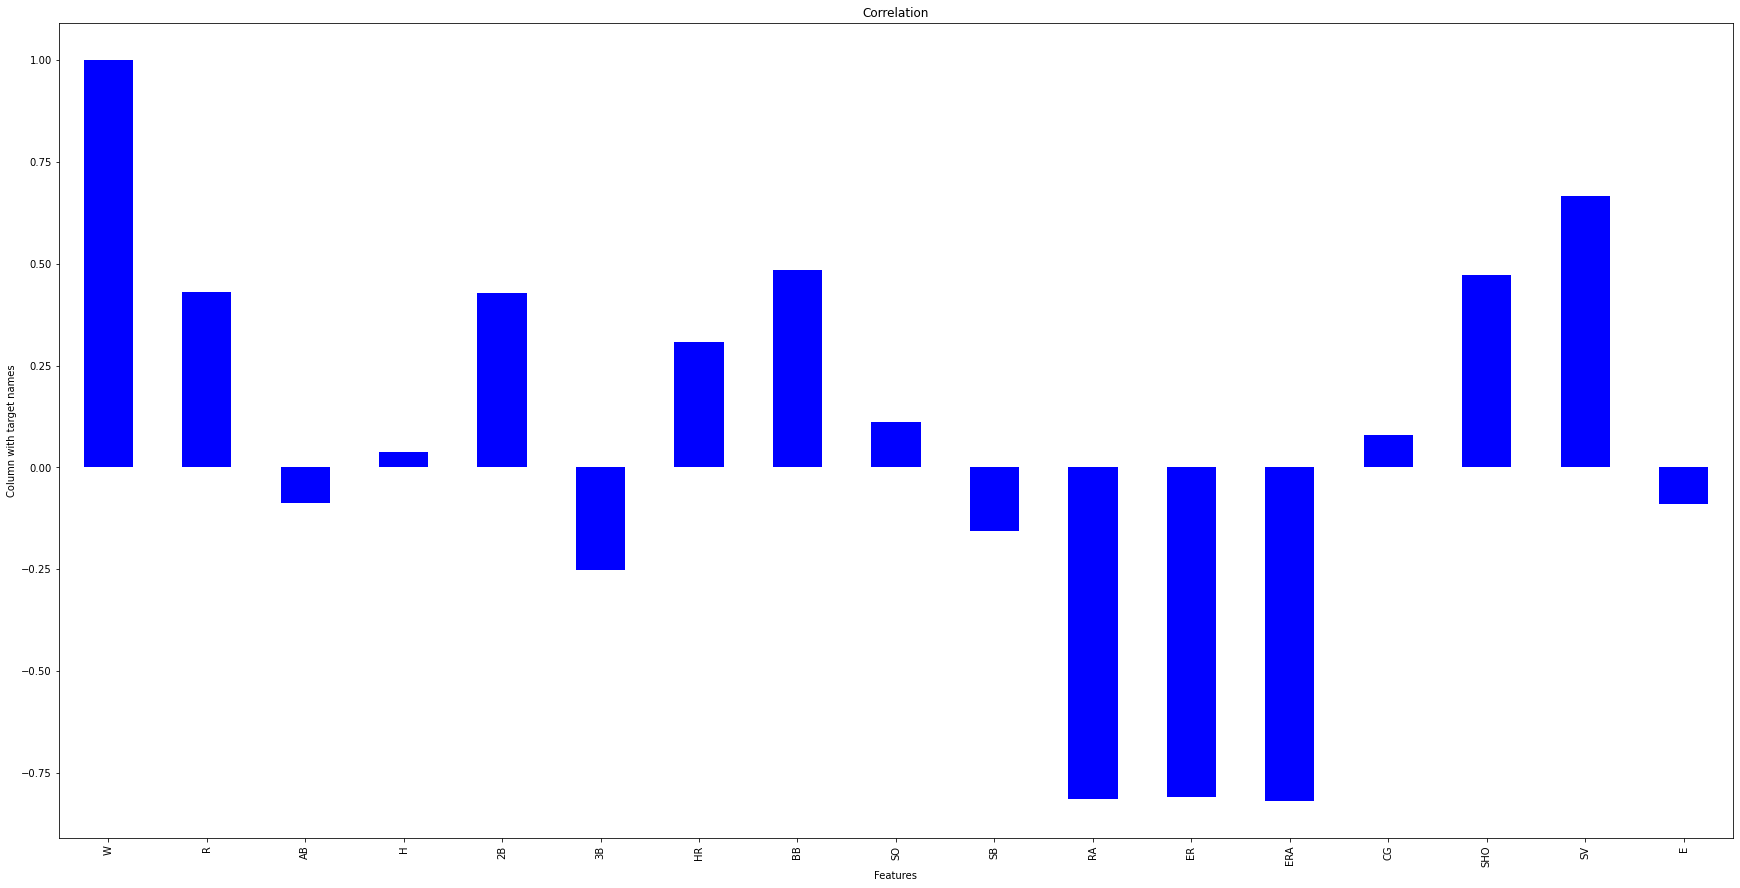

In [17]:
#barplot for correlation

plt.figure(figsize=(30,15))
bc.corr()['W'].plot(kind='bar',color='b')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

As we can see from the correlation matrix and the graph, ER, RA, ERA have the strongest correlation with wins but in negative nature.

In positive side SV has the highest correlation of 0.67 followed by BB, SHO, R, 2B all above 0.4.

Even though ER, RA and ERA are very negatively correlated with wins but they showed highest correlation amongst themselves of over 0.99.

E, CG, H, AB showed less correlated with W.

# Checking outlier using Boxplot

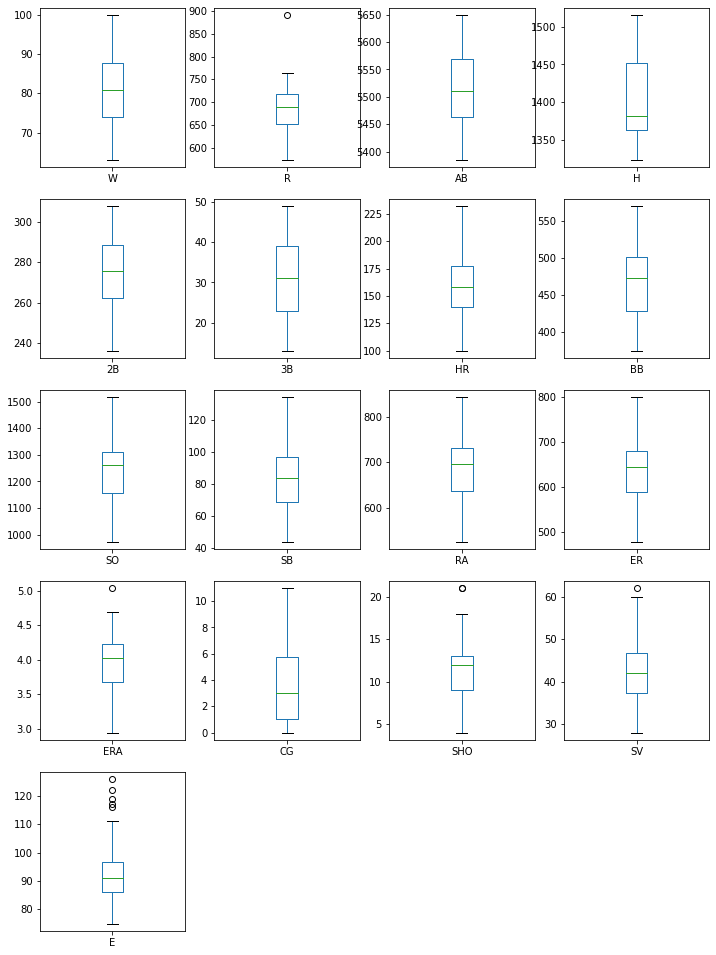

In [18]:
#plotting boxplot to check the outlier ind dataset
bc.plot(kind='box',subplots=True,layout=(7,4),figsize=(12,24))
plt.show()

In E there are more outliers and SV, SHO, ERA, R have single outlier. Lets remove outliers.

# Removing outliers

In [19]:
#Z score technique

from scipy.stats import zscore

z=np.abs(zscore(bc))

In [20]:
bc_new=bc[(z<3).all(axis=1)]
print(bc.shape)
print(bc_new.shape)

(30, 17)
(29, 17)


In [21]:
loss=((30-29)/30)*100
loss

3.3333333333333335

Only 3.33% data is lost so we remove the data

# Skewness

In [22]:
bc.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

R, H, CG, SHO, SV, E all seems to have skewness higher, so we need to treat the skewness present in the data

# spliting data into train(X) and test(Y)

In [23]:
X=bc_new.drop('W',axis=1)
Y=bc_new['W']

In [24]:
#removing skewness

from sklearn.preprocessing import power_transform
#using yeo-johnson

X_new=power_transform(X,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=X.columns)

In [25]:
X_new.skew()

R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Skewness has been removed using power transform

In [26]:
# to normalize the data

from sklearn.preprocessing import StandardScaler

scal=StandardScaler()
X=scal.fit_transform(X_new)

Data is normalized  

In [27]:
#checking shape of data

print(X.shape)
print(Y.shape)

(29, 16)
(29,)


# Checking Best Random State

In [28]:
maxr2=0
rs=0

for i in range(1,500):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=i)
    lin=LinearRegression()
    lin.fit(X_train,Y_train)
    predlin=lin.predict(X_test)
    r2=r2_score(Y_test,predlin)
    if r2>maxr2:
        maxr2=r2
        rs=i
        
print('Max R2 score obtained is ', maxr2,'on random State',rs)

Max R2 score obtained is  0.9337130346280044 on random State 476


We have found best random_state value as 476. We will create our train_test_split using random_state(476)

# Creating Model

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=476)

In [30]:
model=[LinearRegression(),
        Lasso(), Ridge(),
        ElasticNet(),
        RandomForestClassifier(),
        
      ]


In [31]:
r2=[]
mae=[]
mse=[]
rmse=[]
don={}

In [32]:


for modl in range(len(model)):
    mode=model[modl]
    mode.fit(X_train, Y_train)
    prd = mode.predict(X_test)
    r2.append(r2_score(Y_test, prd))
    mse.append(mean_squared_error(Y_test, prd))
    mae.append(mean_absolute_error(Y_test, prd))
    rmse.append(np.sqrt(mean_squared_error(Y_test,prd)))
    

In [34]:
don={'Model':model,'R2_score':r2,
   'mean_absolute_error':mae,
   'mean_squared_error':mse,
   'root_mean_squared_error':rmse}

In [35]:
acc=pd.DataFrame(don)
acc

,Model,R2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,LinearRegression(),0.933713,2.787596,11.209862,3.348113
1,Lasso(),0.869129,4.100440,22.131708,4.704435
2,Ridge(),0.908858,3.153987,15.413070,3.925948
3,ElasticNet(),0.808631,4.780617,32.362617,5.688815
4,"(DecisionTreeClassifier(max_features='auto', r...",0.464520,8.111111,90.555556,9.516068


Linear regression have best R2_score and less errors compare to remaining models. lets check Cross_validation_score for best Model.

# Checking Cross validation score

Here we check cross validation score to find the best Regression Model

In [37]:
from sklearn.model_selection import cross_val_score
crs=[]
for modl in range(len(model)):
    cvrp=cross_val_score(model[modl],X,Y,cv=3)
    
    crs.append(cvrp.mean())   

diff={'Model':model,'R2_score':r2,"Cross_val_score":crs}

accrcy=pd.DataFrame(diff)
accrcy

,Model,R2_score,Cross_val_score
0,LinearRegression(),0.933713,-0.115182
1,Lasso(),0.869129,0.668832
2,Ridge(),0.908858,0.533653
3,ElasticNet(),0.808631,0.526870
4,"(DecisionTreeClassifier(max_features='auto', r...",0.464520,0.000000


As Linear regression have best r2_score and less errors compare to remaining models. 
Difference of R2_score and Cross_validation_score for Lasso is less and errors also less compared to other model except LinearRegression. 
So, Lasso as our best model and performing the hyper Tunning.

# Hyper Tunning Model

In [38]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GSCV

parameters={
    'alpha':[.00001,0.0001,0.001,0.01],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'positive':[True,False],
    'selection':['cyclic','random'],
}

In [39]:
Grid=GridSearchCV(Lasso(),parameters,cv=3) #tunning lasso
Grid.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01],
                         'fit_intercept': [True, False],
                         'normalize': [True, False], 'positive': [True, False],
                         'selection': ['cyclic', 'random']})

In [40]:
lassomod=Lasso(alpha=0.001,fit_intercept=True,normalize=True,positive=False,selection='cyclic')
lassomod.fit(X_train,Y_train)
predt=lassomod.predict(X_test)
print(r2_score(Y_test,predt))
print(mean_squared_error(Y_test,predt))
print(mean_absolute_error(Y_test,predt))


0.9339044767800802
11.177487371190882
2.6721872572918994


After hypertuning with GridSearchCV the R2 score and cross validation score of our Lasso increased

# Final graph for actual and predicted output values

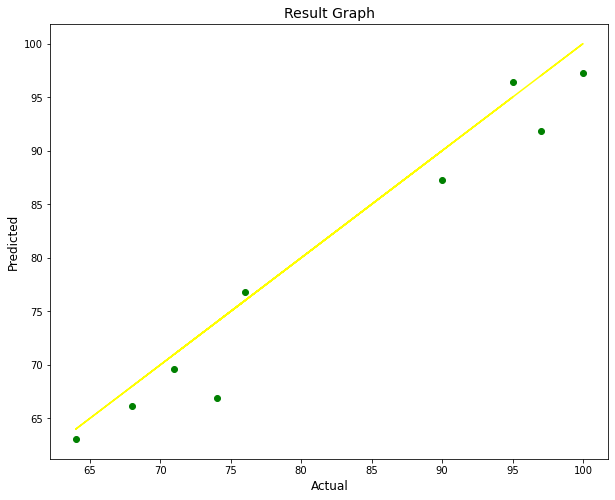

In [41]:
#final graph

plt.figure(figsize=(10,8))
plt.scatter(x=Y_test,y=predt,color='green')
plt.plot(Y_test,Y_test,color='Yellow')
plt.xlabel('Actual',fontsize=12)
plt.ylabel('Predicted',fontsize=12)
plt.title('Result Graph',fontsize=14)
plt.show()

# Saving the model

In [42]:
import joblib

joblib.dump(lassomod,'Baseball.pkl')

['Baseball.pkl']

# Conclusion

loading the model

In [43]:
Lasso=joblib.load('Baseball.pkl')
Predicted=lassomod.predict(X_test)
Predicted

array([66.20033735, 76.80514299, 69.62649279, 87.23687416, 66.90558479,
       96.41193658, 63.07772206, 97.27877457, 91.84160855])

In [44]:
Final=np.array(Y_test)
Final

array([ 68,  76,  71,  90,  74,  95,  64, 100,  97], dtype=int64)

In [45]:
predict=np.array(lassomod.predict(X_test))
predict

array([66.20033735, 76.80514299, 69.62649279, 87.23687416, 66.90558479,
       96.41193658, 63.07772206, 97.27877457, 91.84160855])

In [46]:
bc_pred=pd.DataFrame({"Original":Final,"Predicted":predict},index=range(len(Final)))
bc_pred

,Original,Predicted
0,68,66.200337
1,76,76.805143
2,71,69.626493
3,90,87.236874
4,74,66.905585
5,95,96.411937
6,64,63.077722
7,100,97.278775
8,97,91.841609


We have used Lasso in this dataset and achieve the accuracy score.
It is also used for predicting the number of wins for a baseball team